In [1]:
# Q5
7.5 + 2.093* 6.3/(20)**0.5

10.448456874451448

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_ind


# Mean and standard deviation for both groups
m1, m2 = 3, 5
sd1, sd2 = 4.5, 3.0
n1, n2 = 50, 50

# Generate samples for both groups

x = np.random.normal(loc=m1, scale=sd1, size=n1)
y = np.random.normal(loc=m2, scale=sd2, size=n2)

# Calculate confidence intervals for both groups
error1 = norm.ppf(0.975) * x.std(ddof=1) / np.sqrt(n1)
error2 = norm.ppf(0.975) * y.std(ddof=1) / np.sqrt(n2)
CI_l_1, CI_u_1 = x.mean() - error1, x.mean() + error1
CI_l_2, CI_u_2 = y.mean() - error2, y.mean() + error2

# Calculate the pooled standard error, error mean difference, and confidence intervals for the mean difference
se = np.sqrt(x.var(ddof=1) / n1 + y.var(ddof=1) / n2)
error = t.ppf(0.975, df=n1 + n2 - 2) * se
mdif = y.mean() - x.mean()
CI_l_d, CI_u_d = mdif - error, mdif + error

# Prepare data for the plot
d = {
    "labels": ["X", "Y", "Difference"],
    "mean": [x.mean(), y.mean(), mdif],
    "lower": [CI_l_1, CI_l_2, CI_l_d],
    "upper": [CI_u_1, CI_u_2, CI_u_d],
}


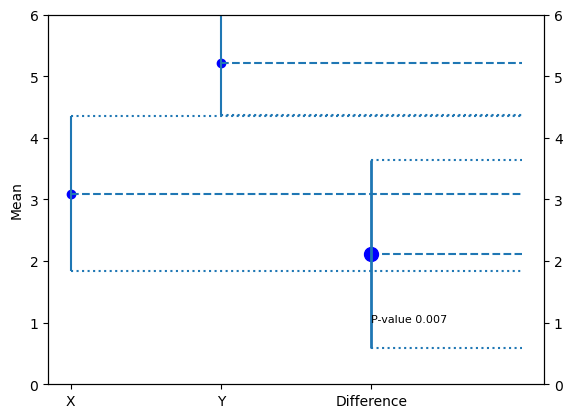

In [102]:

# Plot the data
fig, ax = plt.subplots()


ax.set_xticks([1, 2, 3])
ax.set_xticklabels(d["labels"])
ax.set_ylabel("Mean")
ax.plot([1, 2], d["mean"][:2], "bo")
ax.hlines(d["mean"][:3], [1, 2, 3], [4, 4, 4], linestyles="dashed")
ax.hlines(d["lower"][:3], [1, 2, 3], [4, 4, 4], linestyles="dotted")
ax.hlines(d["upper"][:3], [1, 2, 3], [4, 4, 4], linestyles="dotted")
ax.vlines([1, 2], d["lower"][:2], d["upper"][:2])
ax.plot(3, d["mean"][2], "bo", markersize=10)
ax.vlines(3, CI_l_d, CI_u_d, lw=2)


# Calculate p-value
_, p_value = ttest_ind(x, y, equal_var=True)
ax.text(3, 1, f"P-value {p_value:.3f}", fontsize=8)
ax.set_ylim(0, 6)
ax2 = ax.twinx()
ax2.set_ylim(0, 6)
plt.show()


In [161]:
# Function-alize
def generate_CI_plots(m1,m2,sd1,sd2,n1,n2):
    # Generate samples for both groups

    x = np.random.normal(loc=m1, scale=sd1, size=n1)
    y = np.random.normal(loc=m2, scale=sd2, size=n2)

    # Calculate confidence intervals for both groups
    error1 = norm.ppf(0.975) * x.std(ddof=1) / np.sqrt(n1)
    error2 = norm.ppf(0.975) * y.std(ddof=1) / np.sqrt(n2)
    CI_l_1, CI_u_1 = x.mean() - error1, x.mean() + error1
    CI_l_2, CI_u_2 = y.mean() - error2, y.mean() + error2

    # Calculate the pooled standard error, error mean difference, and confidence intervals for the mean difference
    se = np.sqrt(x.var(ddof=1) / n1 + y.var(ddof=1) / n2)
    error = t.ppf(0.975, df=n1 + n2 - 2) * se
    mdif = y.mean() - x.mean()
    CI_l_d, CI_u_d = mdif - error, mdif + error

    # Prepare data for the plot
    d = {
        "labels": ["X", "Y", "Difference"],
        "mean": [x.mean(), y.mean(), mdif],
        "lower": [CI_l_1, CI_l_2, CI_l_d],
        "upper": [CI_u_1, CI_u_2, CI_u_d],
    }

    # Plot the data
    fig, ax = plt.subplots()


    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(d["labels"])
    ax.set_ylabel("Mean")
    ax.plot([1, 2], d["mean"][:2], "bo")
    ax.hlines(d["mean"][:3], [1, 2, 3], [4, 4, 4], linestyles="dashed")
    ax.hlines(d["lower"][:3], [1, 2, 3], [4, 4, 4], linestyles="dotted")
    ax.hlines(d["upper"][:3], [1, 2, 3], [4, 4, 4], linestyles="dotted")
    ax.vlines([1, 2], d["lower"][:2], d["upper"][:2])
    ax.plot(3, d["mean"][2], "bo", markersize=10)
    ax.vlines(3, CI_l_d, CI_u_d, lw=2)
    y_min = min(d['lower'])-1
    y_max = max(d['upper'])+1

    # Calculate p-value
    _, p_value = ttest_ind(x, y, equal_var=True)
    ax.text(3.2, 2, f"P-value {p_value:.3f}", fontsize=12)
    ax.set_ylim(y_min, y_max)
    ax2 = ax.twinx()
    ax2.set_ylim(y_min, y_max)
    plt.show()


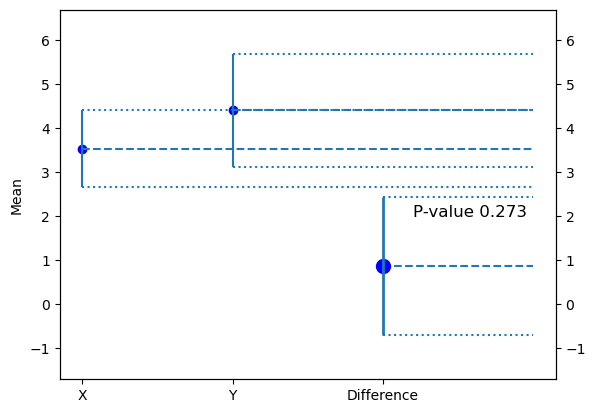

In [178]:
generate_CI_plots(3,3,3,5,50,50)

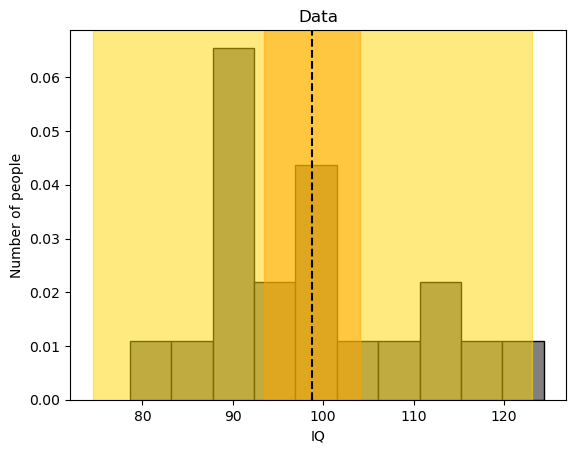

94.37 % of the 95% confidence intervals contained the true mean
The capture percentage for the plotted study, or the % of values within the observed confidence interval from 93.50251480540783 to 104.10280057666253 is: 86.89 %


In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
n = 20  # set sample size
n_sims = 10000  # set number of simulations

x = np.random.normal(loc=100, scale=15, size=n)  # create sample from normal distribution

# 95% Confidence Interval
CIU = np.mean(x) + scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 / n)
CIL = np.mean(x) - scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 / n)

# 95% Prediction Interval
PIU = np.mean(x) + scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 + 1 / n)
PIL = np.mean(x) - scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 + 1 / n)

# plot data
plt.hist(x, color="gray", edgecolor="black", density=True)
plt.axvspan(PIL, PIU, color="gold", alpha=0.5)
plt.axvspan(CIL, CIU, color="orange", alpha=0.5)
plt.axvline(np.mean(x), color="black", linestyle="--")
plt.xlabel("IQ")
plt.ylabel("Number of people")
plt.title("Data")
plt.show()

# Simulate Confidence Intervals
CIU_sim = np.zeros(n_sims)
CIL_sim = np.zeros(n_sims)
mean_sim = np.zeros(n_sims)

for i in range(n_sims):
    x_sim = np.random.normal(loc=100, scale=15, size=n)
    CIU_sim[i] = np.mean(x_sim) + scipy.stats.t.ppf(0.975, df=n-1) * np.std(x_sim) * np.sqrt(1 / n)
    CIL_sim[i] = np.mean(x_sim) - scipy.stats.t.ppf(0.975, df=n-1) * np.std(x_sim) * np.sqrt(1 / n)
    mean_sim[i] = np.mean(x_sim)

# Save only those simulations where the true value was inside the 95% CI
CIU_sim = CIU_sim[CIU_sim < 100]
CIL_sim = CIL_sim[CIL_sim > 100]

print(100 * (1 - (len(CIU_sim) / n_sims + len(CIL_sim) / n_sims)), "% of the 95% confidence intervals contained the true mean")

# Calculate how many times the observed mean fell within the 95% CI of the original study
mean_sim = mean_sim[(mean_sim > CIL) & (mean_sim < CIU)]
print("The capture percentage for the plotted study, or the % of values within the observed confidence interval from", CIL, "to", CIU, "is:", 100 * len(mean_sim) / n_sims, "%")


In [224]:
nominator = 0
denominator = 0
for i in range(10000):
    x = np.random.normal(loc=100, scale=15, size=n)  # create sample from normal distribution

    # 95% Confidence Interval
    CIU = np.mean(x) + scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 / n)
    CIL = np.mean(x) - scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 / n)
    nominator += len(mean_sim[(mean_sim > CIL) & (mean_sim < CIU)])
    denominator += len(mean_sim)

In [225]:
nominator/denominator

0.8746917942225803

In [226]:
CIU = 94 + scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 / n)
CIL = 94 - scipy.stats.t.ppf(0.975, df=n-1) * np.std(x) * np.sqrt(1 / n)

In [227]:
mean_sim = mean_sim[(mean_sim > CIL) & (mean_sim < CIU)]

In [229]:
100 * len(mean_sim) / n_sims

42.7

# Sample size

/Users/chengjiayang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


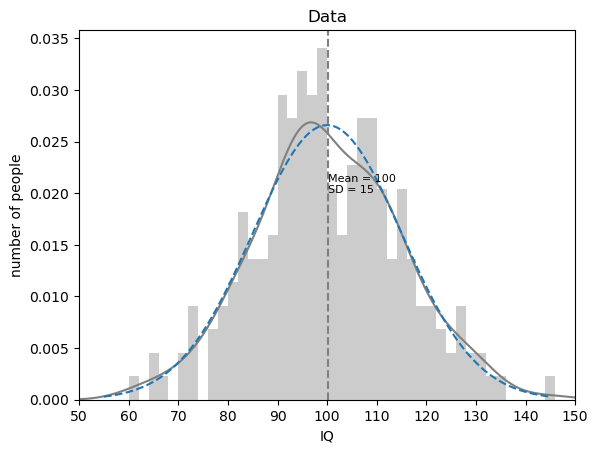

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Simulate one group
n = 220  # set sample size
std = 15
x = np.random.normal(loc=100, scale=std, size=n)  # create sample from normal distribution

# Plot data
sns.distplot(x, kde=True, color="grey", bins=np.arange(50, 150, 2))
plt.xlabel("IQ")
plt.ylabel("number of people")
plt.title("Data")
plt.xlim(50, 150)
plt.xticks(np.arange(50, 151, 10))

# Plot normal distribution curve
mean = 100
std_dev = std

# Generate points for the x-axis
x_true = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)

# Calculate the corresponding y values (probability density) for the normal distribution
y_true = norm.pdf(x_true, mean, std_dev)

# Plot the normal distribution
plt.plot(x_true, y_true,linestyle="--")



# Plot mean line and annotate
mean_x = np.mean(x)
plt.axvline(mean_x, color="gray", linestyle="--")
plt.annotate(f"Mean = {round(mean_x)}\nSD = {round(np.std(x))}", xy=(mean_x, 0.02), fontsize=8)

plt.show()


In [260]:
sim_mean = []
sim_std = []
for trail in range(10):
    x = np.random.normal(loc=100, scale=15, size=n)  # create sample from normal distribution
    sim_mean.append(np.mean(x))
    sim_std.append(x.std())

In [265]:
max(sim_mean)-min(sim_mean)

14.19762664638742

In [266]:
max(sim_std)-min(sim_std)

6.516465368819171

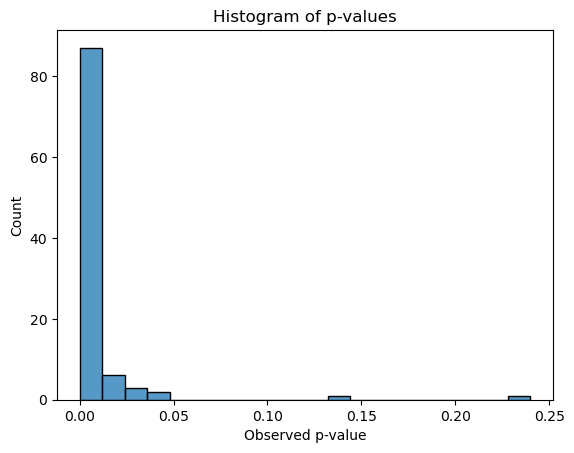

In [351]:
import numpy as np
import scipy.stats as stats
import time
import matplotlib.pyplot as plt

showfaces = 0  # Set to 0 if you do not want the faces, set to 1 if you want to see the faces

nSims = 100  # number of simulated experiments (for large numbers, set wait to 0 and showfaces to 0)
n = 651  # sample size in each group

# set up some variables
p = np.zeros(nSims)

for i in range(nSims):  # for each simulated experiment
    x = np.random.normal(loc=100, scale=15, size=n)  # produce N simulated participants
    y = np.random.normal(loc=103, scale=15, size=n)  # produce N simulated participants
    z = stats.ttest_ind(x, y)  # perform the t-test
    p[i] = z.pvalue  # get the p-value and store it
    if z.pvalue < 0.001 and showfaces == 1:
        print(":D     p =", z.pvalue, "\n\n")
    if 0.001 <= z.pvalue < 0.01 and showfaces == 1:
        print(":)     p =", z.pvalue, "\n\n")
    if 0.01 <= z.pvalue < 0.05 and showfaces == 1:
        print("(^.^)  p =", z.pvalue, "\n\n")
    if 0.05 <= z.pvalue < 0.10 and showfaces == 1:
        print("(._.)  p =", z.pvalue, "\n\n")
    if z.pvalue > 0.10 and showfaces == 1:
        print(":(     p =", z.pvalue, "\n\n")


# now plot histograms of p-values
sns.histplot(p,bins =20)
plt.title("Histogram of p-values")
plt.xlabel("Observed p-value") 

plt.show()


In [352]:
len(p[p<0.05])

98

In [343]:
(15**2*(1.96+1.64)**2)/(3**2)

323.99999999999994

In [344]:
324*2

648

In [353]:
2*((1.96+0.84)**2)/(0.42**2)

88.88888888888889